In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("G:/Education/Machine Learning/ML_CSV_FILES/Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.drop(['Serial No.'], axis = 1, inplace = True)

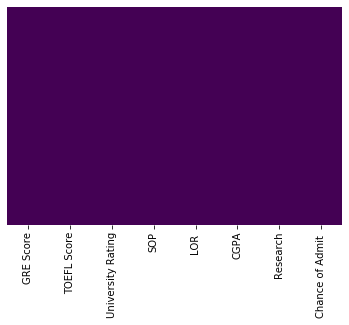

In [4]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

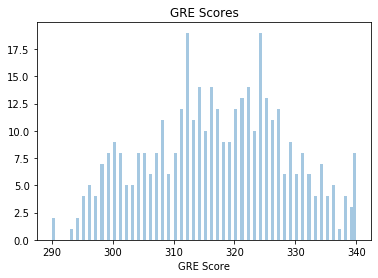

In [5]:
fig = sns.distplot(df['GRE Score'],bins = 100 ,kde=False)
plt.title("GRE Scores")
plt.show()

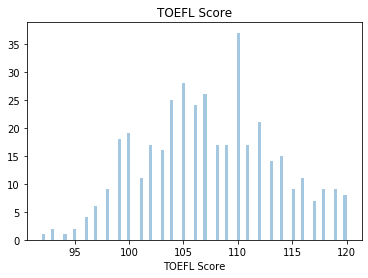

In [6]:
fig = sns.distplot(df['TOEFL Score'],bins = 100 ,kde=False)
plt.title("TOEFL Score")
plt.show()

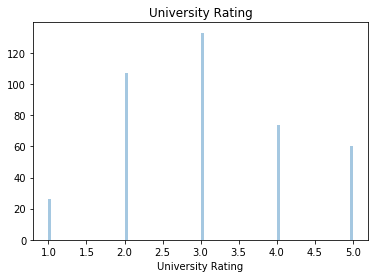

In [7]:
fig = sns.distplot(df['University Rating'],bins = 100 ,kde=False)
plt.title("University Rating")
plt.show()

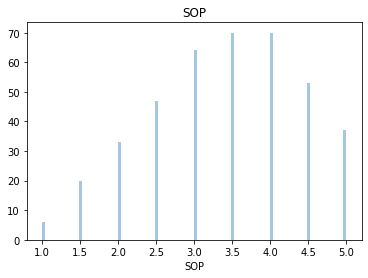

In [8]:
fig = sns.distplot(df['SOP'],bins = 100 ,kde=False)
plt.title("SOP")
plt.show()

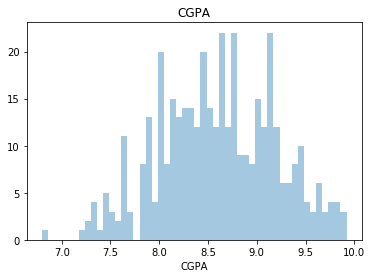

In [9]:
fig = sns.distplot(df['CGPA'],bins = 50 ,kde=False)
plt.title("CGPA")
plt.show()

# COMPARISION b/w DIFFERENT VARIABLES

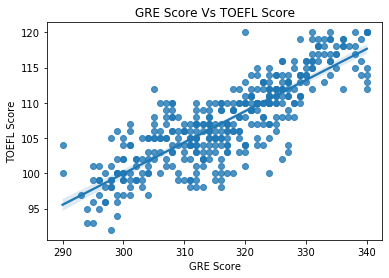

In [10]:
fig = sns.regplot(x = "GRE Score", y = "TOEFL Score", data = df)
plt.title("GRE Score Vs TOEFL Score")
plt.show()

* GRE SCORE & TOEFL SCORE ARE DIRECTLY PROPORTIONAL

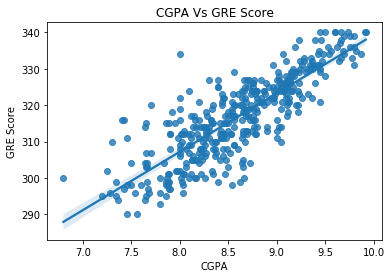

In [11]:
fig = sns.regplot(x = "CGPA", y = "GRE Score", data = df)
plt.title("CGPA Vs GRE Score")
plt.show()

* CGPA & GRE SCORES ARE DIRECTLY PROPORTIONAL TO EACHOTHER
* HIGHER THE CGPA HIGHER THE GRE SCORE

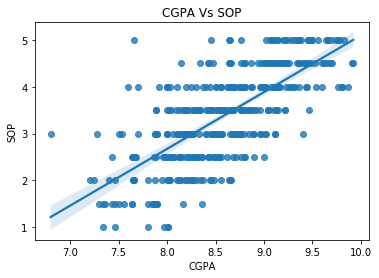

In [12]:
fig = sns.regplot(x="CGPA", y="SOP", data=df)
plt.title("CGPA Vs SOP")
plt.show()

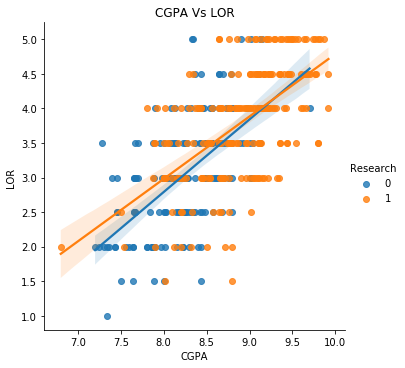

In [13]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("CGPA Vs LOR")
plt.show()

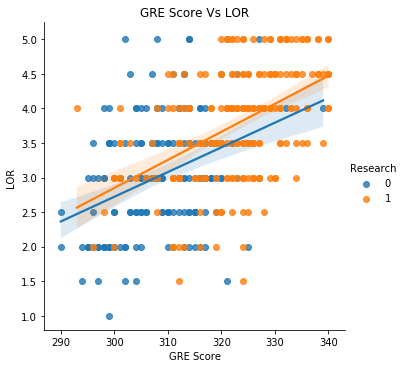

In [14]:
fig = sns.lmplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score Vs LOR")
plt.show()

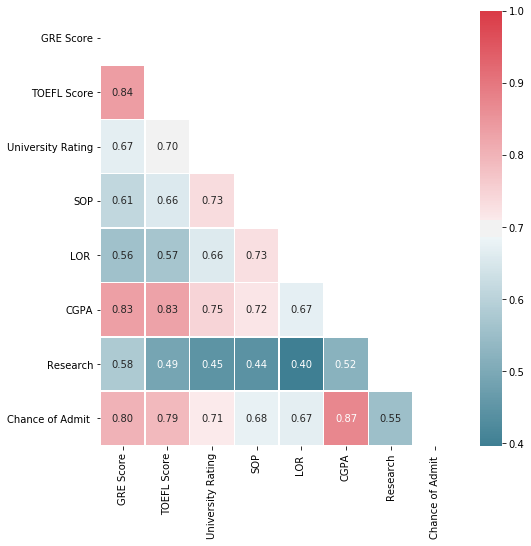

In [15]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

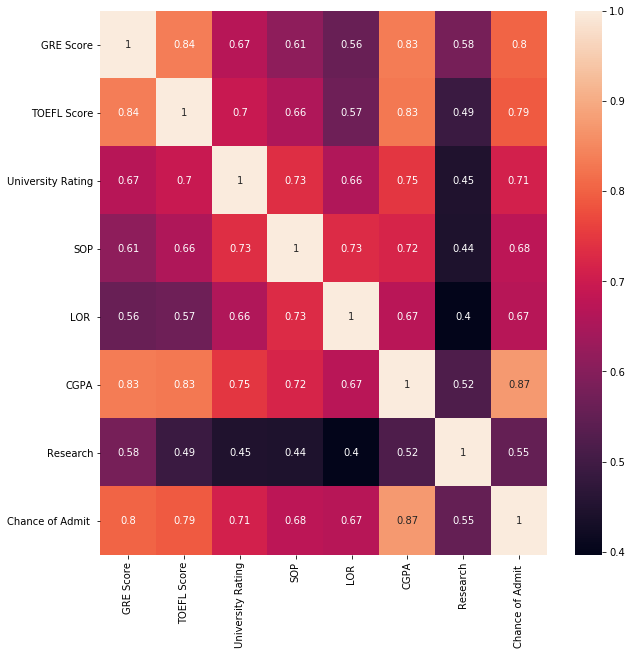

In [16]:
plt.figure(figsize =(10,10))
sns.heatmap(df.corr(),annot= True,cmap = 'rocket')

In [17]:
x = df.drop(['Chance of Admit '], axis = 1)
y = df['Chance of Admit ']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 1/3)

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)]]

In [21]:
print("Results")

for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results
DecisionTree : 0.10621015495198832
Linear Regression : 0.06668695898957443
RandomForest : 0.07601407813442759
KNeighbours : 0.08867179127075407


In [22]:
classifier = RandomForestRegressor()
classifier.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
feature_names = x.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = x.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

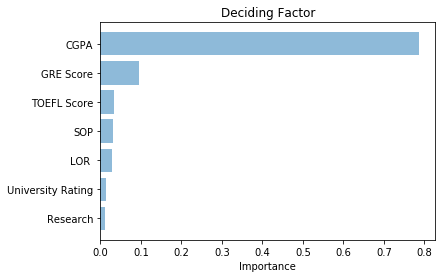

In [24]:
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Deciding Factor')
plt.show()

* CGPA IS THE HIGHEST DECIDING FACTOR IN GETTING PLACED IN A  UNIVERSITY